In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [3]:
# Load dataset from GitHub
url = 'https://raw.githubusercontent.com/nguatta/multilingual-customer-support-analytics/main/data/raw/multilingual_support_tickets.csv'

df = pd.read_csv(url)

print(f"📊 Dataset loaded: {len(df)} tickets")
print(f"🗓️ Columns: {list(df.columns)}")
print("\n✅ First 5 rows:")
df.head()


📊 Dataset loaded: 210 tickets
🗓️ Columns: ['Ticket_id', 'Customer_Language', 'Agent_languages', 'Satisfaction', 'Resolution_Time', 'Category_Issue', 'Issue_Type', 'Region', 'Priority', 'Language_Match', 'Subject', 'Description']

✅ First 5 rows:


,Ticket_id,Customer_Language,Agent_languages,Satisfaction,Resolution_Time,Category_Issue,Issue_Type,Region,Priority,Language_Match,Subject,Description
0,T001,fr,it;fr,4.2,65.6,Other,Other,Europe,1,True,Security Concern,Support ticket for security concern
1,T002,en,es;it,3.3,95.9,Employee Inquiries-IT Support,Software,Europe,1,False,Hardware Problem,Support ticket for hardware problem
2,T003,es,en;es;de,4.3,66.2,Employee Inquiries-IT Support,Software,Europe,1,True,Email Setup,Support ticket for email setup
3,T004,en,pt;fr;en,4.7,81.4,Employee Inquiries-IT Support,Software,Americas,1,True,Data Recovery,Support ticket for data recovery
4,T005,es,en;es,4.8,99.4,Other,Other,Europe,1,True,Integration Problem,Support ticket for integration problem


In [4]:
# Load dataset from GitHub
url = 'https://raw.githubusercontent.com/nguatta/multilingual-customer-support-analytics/main/data/raw/multilingual_support_tickets.csv'

df = pd.read_csv(url)

print(f"📊 Dataset loaded: {len(df)} tickets")
print(f"🗓️ Columns: {list(df.columns)}")
print("\n✅ First 5 rows:")
df.head()


📊 Dataset loaded: 210 tickets
🗓️ Columns: ['Ticket_id', 'Customer_Language', 'Agent_languages', 'Satisfaction', 'Resolution_Time', 'Category_Issue', 'Issue_Type', 'Region', 'Priority', 'Language_Match', 'Subject', 'Description']

✅ First 5 rows:


,Ticket_id,Customer_Language,Agent_languages,Satisfaction,Resolution_Time,Category_Issue,Issue_Type,Region,Priority,Language_Match,Subject,Description
0,T001,fr,it;fr,4.2,65.6,Other,Other,Europe,1,True,Security Concern,Support ticket for security concern
1,T002,en,es;it,3.3,95.9,Employee Inquiries-IT Support,Software,Europe,1,False,Hardware Problem,Support ticket for hardware problem
2,T003,es,en;es;de,4.3,66.2,Employee Inquiries-IT Support,Software,Europe,1,True,Email Setup,Support ticket for email setup
3,T004,en,pt;fr;en,4.7,81.4,Employee Inquiries-IT Support,Software,Americas,1,True,Data Recovery,Support ticket for data recovery
4,T005,es,en;es,4.8,99.4,Other,Other,Europe,1,True,Integration Problem,Support ticket for integration problem


🌍 LANGUAGE DISTRIBUTION

Customer Languages:
  EN: 83 tickets (39.5%)
  ES: 49 tickets (23.3%)
  DE: 31 tickets (14.8%)
  FR: 28 tickets (13.3%)
  PT: 17 tickets (8.1%)
  IT: 2 tickets (1.0%)


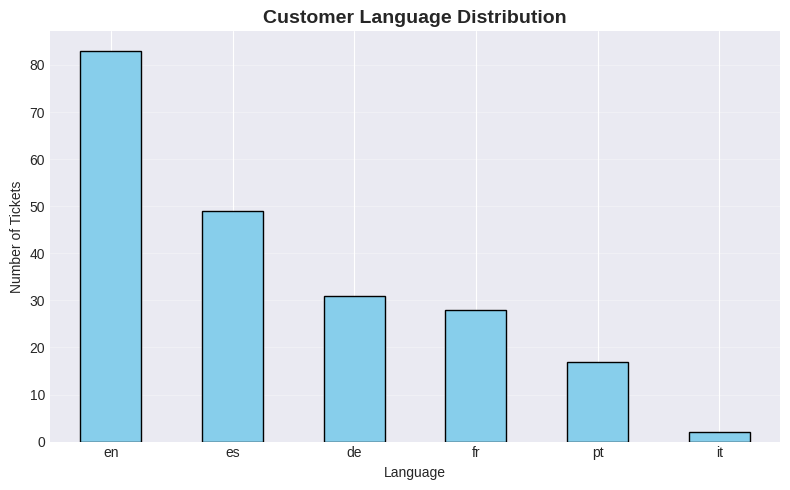

In [5]:
print("🌍 LANGUAGE DISTRIBUTION")
print("=" * 60)

lang_dist = df['Customer_Language'].value_counts()
lang_pct = (lang_dist / len(df) * 100).round(1)

print("\nCustomer Languages:")
for lang, count in lang_dist.items():
    pct = lang_pct[lang]
    print(f"  {lang.upper()}: {count} tickets ({pct}%)")

plt.figure(figsize=(8, 5))
lang_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Language Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [7]:
print("🎯 LANGUAGE MATCH IMPACT")
print("=" * 60)

matched = df[df['Language_Match'] == True]
unmatched = df[df['Language_Match'] == False]

print(f"\n📊 Sample Sizes:")
print(f"  Matched: {len(matched)} tickets ({len(matched)/len(df)*100:.1f}%)")
print(f"  Unmatched: {len(unmatched)} tickets ({len(unmatched)/len(df)*100:.1f}%)")

# Satisfaction comparison
match_sat = matched['Satisfaction'].mean()
unmatch_sat = unmatched['Satisfaction'].mean()
sat_improvement = ((match_sat - unmatch_sat) / unmatch_sat * 100)

print(f"\n⭐ SATISFACTION SCORES:")
print(f"  Matched: {match_sat:.2f}/5.0")
print(f"  Unmatched: {unmatch_sat:.2f}/5.0")
print(f"  Improvement: +{sat_improvement:.1f}%")

# Resolution time comparison
match_time = matched['Resolution_Time'].mean()
unmatch_time = unmatched['Resolution_Time'].mean()
time_improvement = ((unmatch_time - match_time) / unmatch_time * 100)

print(f"\n⏱️ RESOLUTION TIME:")
print(f"  Matched: {match_time:.1f} hours")
print(f"  Unmatched: {unmatch_time:.1f} hours")
print(f"  Improvement: -{time_improvement:.1f}%")


🎯 LANGUAGE MATCH IMPACT

📊 Sample Sizes:
  Matched: 84 tickets (40.0%)
  Unmatched: 126 tickets (60.0%)

⭐ SATISFACTION SCORES:
  Matched: 4.52/5.0
  Unmatched: 3.25/5.0
  Improvement: +38.9%

⏱️ RESOLUTION TIME:
  Matched: 78.8 hours
  Unmatched: 112.9 hours
  Improvement: -30.2%


In [8]:
print("🔬 STATISTICAL SIGNIFICANCE TESTING")
print("=" * 60)

# T-test for satisfaction
t_stat_sat, p_value_sat = ttest_ind(
    matched['Satisfaction'],
    unmatched['Satisfaction']
)

# T-test for resolution time
t_stat_time, p_value_time = ttest_ind(
    matched['Resolution_Time'],
    unmatched['Resolution_Time']
)

print(f"\n📊 Satisfaction T-Test:")
print(f"  t-statistic: {t_stat_sat:.3f}")
print(f"  p-value: {p_value_sat:.6f}")
print("  Result:", "SIGNIFICANT (p < 0.01)" if p_value_sat < 0.01 else "NOT significant")

print(f"\n⏱️ Resolution Time T-Test:")
print(f"  t-statistic: {t_stat_time:.3f}")
print(f"  p-value: {p_value_time:.6f}")
print("  Result:", "SIGNIFICANT (p < 0.01)" if p_value_time < 0.01 else "NOT significant")


🔬 STATISTICAL SIGNIFICANCE TESTING

📊 Satisfaction T-Test:
  t-statistic: 23.591
  p-value: 0.000000
  Result: SIGNIFICANT (p < 0.01)

⏱️ Resolution Time T-Test:
  t-statistic: -22.497
  p-value: 0.000000
  Result: SIGNIFICANT (p < 0.01)


/tmp/ipython-input-1448410599.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([matched['Resolution_Time'], unmatched['Resolution_Time']],


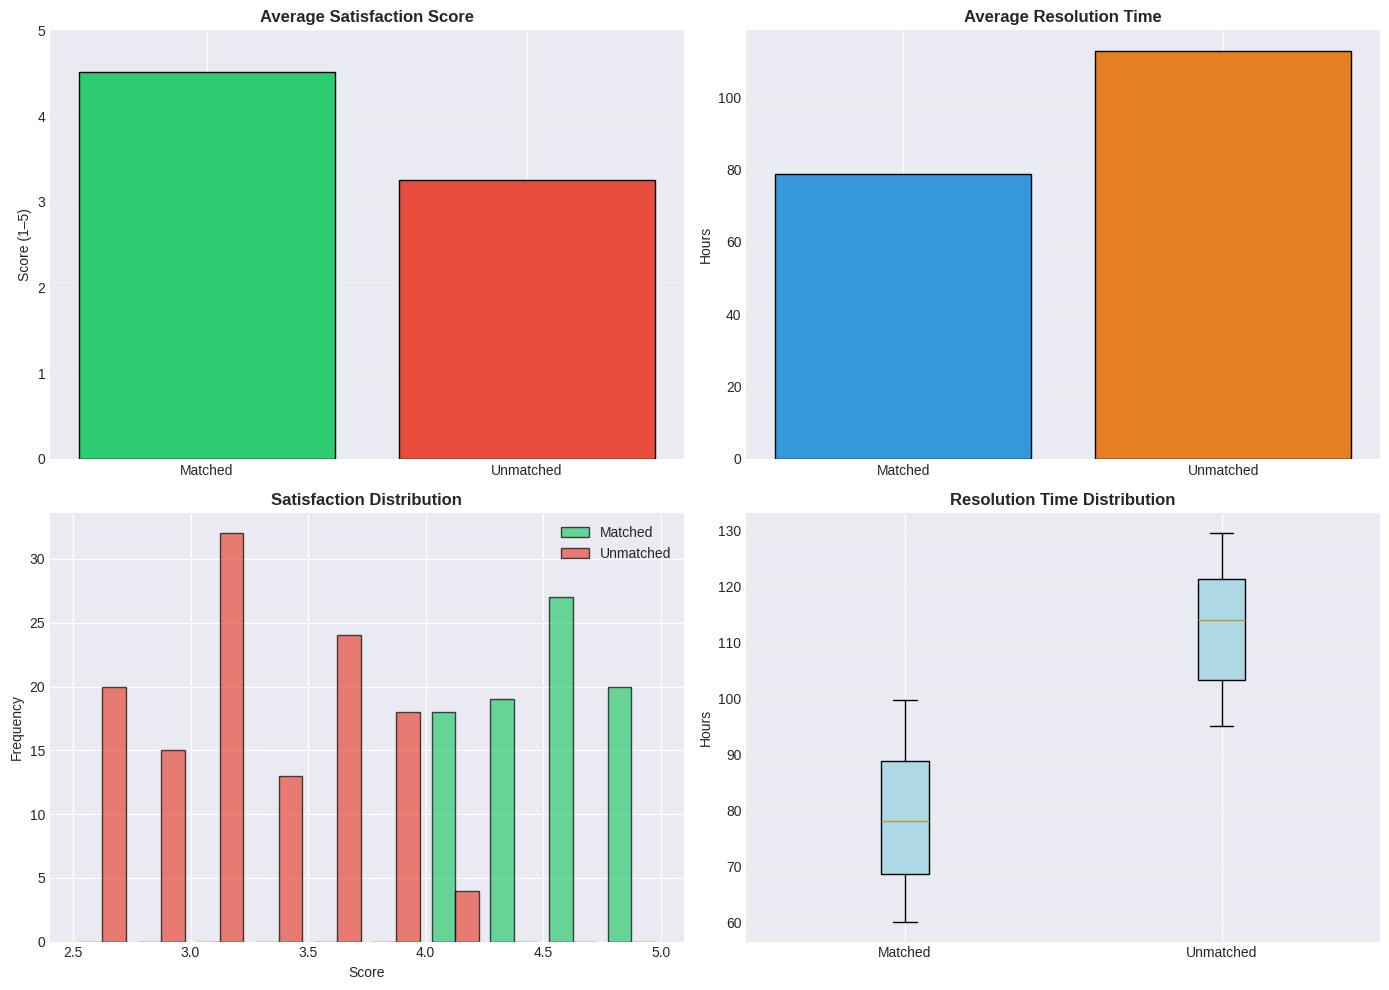

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Average satisfaction
axes[0, 0].bar(['Matched', 'Unmatched'], [match_sat, unmatch_sat],
               color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0, 0].set_title('Average Satisfaction Score', fontweight='bold')
axes[0, 0].set_ylabel('Score (1–5)')
axes[0, 0].set_ylim(0, 5)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Average resolution time
axes[0, 1].bar(['Matched', 'Unmatched'], [match_time, unmatch_time],
               color=['#3498db', '#e67e22'], edgecolor='black')
axes[0, 1].set_title('Average Resolution Time', fontweight='bold')
axes[0, 1].set_ylabel('Hours')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Satisfaction distribution
axes[1, 0].hist([matched['Satisfaction'], unmatched['Satisfaction']],
                bins=10, label=['Matched', 'Unmatched'],
                color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Satisfaction Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 4. Resolution time distribution
axes[1, 1].boxplot([matched['Resolution_Time'], unmatched['Resolution_Time']],
                   labels=['Matched', 'Unmatched'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
axes[1, 1].set_title('Resolution Time Distribution', fontweight='bold')
axes[1, 1].set_ylabel('Hours')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
print("💰 BUSINESS IMPACT ESTIMATE")
print("=" * 60)

avg_agent_cost_per_hour = 25   # EUR
tickets_per_month = 1000

current_avg_time = df['Resolution_Time'].mean()
current_monthly_cost = tickets_per_month * current_avg_time * avg_agent_cost_per_hour

match_rate = 0.80
optimized_avg_time = (match_rate * match_time) + ((1 - match_rate) * unmatch_time)
optimized_monthly_cost = tickets_per_month * optimized_avg_time * avg_agent_cost_per_hour

monthly_savings = current_monthly_cost - optimized_monthly_cost
annual_savings = monthly_savings * 12

print(f"\nCurrent avg resolution time: {current_avg_time:.1f} hours")
print(f"Optimized avg resolution time: {optimized_avg_time:.1f} hours")

print(f"\nEstimated monthly savings: €{monthly_savings:,.0f}")
print(f"Estimated annual savings:  €{annual_savings:,.0f}")


💰 BUSINESS IMPACT ESTIMATE

Current avg resolution time: 99.3 hours
Optimized avg resolution time: 85.6 hours

Estimated monthly savings: €341,313
Estimated annual savings:  €4,095,762
